In [3]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
import os

In [5]:
import statistics

file_path_to_test_data = os.environ.get("HW1_QUESTION1_DATASET_PATH") + "test_data.txt"
file_path_to_entire_data = os.environ.get("HW1_QUESTION1_DATASET_PATH") + "acm.txt"

with open(file_path_to_entire_data) as f:
    lines = f.readlines()

entire_dataset = []
datapoint = {}
for line in lines:
    if line.startswith("#*"):
        datapoint['title'] = line[2:-1]
    elif line.startswith("#t"):
        datapoint['year'] = int(line[2:-1])
    elif line.startswith("#c"):
        datapoint['venue'] = line[2:-1]
    elif line.startswith("#index"):
        datapoint['index'] = int(line[6:-1])
    elif line.startswith("#@"):
        datapoint['author'] = line[2:-1].split(", ")
    elif line.startswith("#%"):
        if 'citations' in datapoint:
            datapoint['citations'].append(line[2:-1])
        else:
            datapoint['citations'] = [line[2:-1]]
    elif line.startswith("#!"):
        datapoint['abstract'] = line[2:-1]
    elif line.startswith("\n"):
        entire_dataset.append(datapoint)
        datapoint = {}


In [6]:
all_authors = []
all_venues = []
all_citations = []
for record in entire_dataset:
    all_authors.extend(record['author']) if 'author' in record else all_authors
    all_venues.append(record['venue']) if 'venue' in record else all_venues
    all_citations.extend(record['citations']) if 'citations' in record else all_citations

unique_authors = list(set(all_authors))
unique_venues = list(set(all_venues))
unique_citations = list(set(all_citations))
print("Number of unique authors:", len(unique_authors))
print("Number of unique venues:", len(unique_venues))
print("Number of unique citations:", len(unique_citations))

Number of unique authors: 1658485
Number of unique venues: 273329
Number of unique citations: 1007495


In [7]:
pkdd_venues = []
for record in entire_dataset:
    if 'venue' in record:
        if "Principles and Practice of Knowledge Discovery in Databases" in record['venue']:
            pkdd_venues.append(record['venue'])

print("The publications venue names associated with the conference 'Principles and Practice of Knowledge Discovery in Databases':", pkdd_venues)
print("Number of publications venue names associated with the conference 'Principles and Practice of Knowledge Discovery in Databases':", len(pkdd_venues))


The publications venue names associated with the conference 'Principles and Practice of Knowledge Discovery in Databases': ["PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases", "PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases", "PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases", "PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases", "PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases", "PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases", "PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases", "PKDD '04 Proceedings of the 8th European Conferen

In [8]:
authors_and_their_publications_dataset = {}

for rec in entire_dataset:
    if 'author' in rec:
        for a in rec['author']:
            if a in authors_and_their_publications_dataset:
                authors_and_their_publications_dataset[a] += 1
            else:
                authors_and_their_publications_dataset[a] = 1

print("Competed!")
print(len(authors_and_their_publications_dataset))

# for author in unique_authors:
#     current_authors_publications = []
#     current_author_record = {'author': author}
#     for record in entire_dataset:
#         if 'author' in record:
#             if author in record['author']:
#                 current_authors_publications.append(record['title'])
#     current_author_record['all_publications'] = current_authors_publications
#     current_author_record['number_of_publications'] = len(current_authors_publications)
#     authors_and_their_publications_dataset.append(current_author_record)

# print(authors_and_their_publications_dataset[:10])
# print("\n\n\n")

# authors_and_their_publications_dataset.sort(key=lambda x: x['number_of_publications'], reverse=False)
# print(authors_and_their_publications_dataset[:10])


Competed!
1658485


In [9]:
import matplotlib.pyplot as plt

[68, 7, 18, 418, 36, 8, 1, 4, 2, 1]


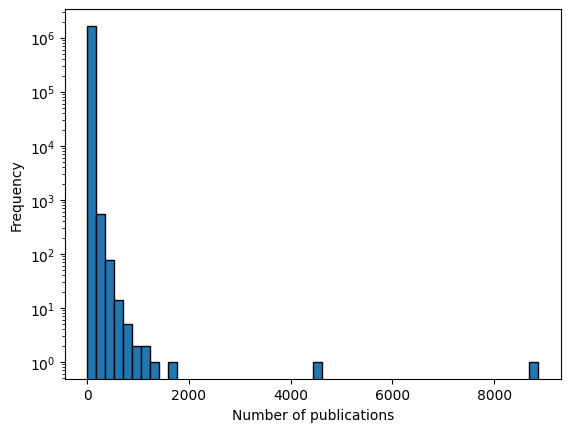

In [10]:
no_of_publications_by_each_author = [v for _, v in authors_and_their_publications_dataset.items()]
print(no_of_publications_by_each_author[:10])

plt.hist(no_of_publications_by_each_author, bins=50, log=True, edgecolor='black')
plt.xlabel('Number of publications')
plt.ylabel('Frequency')
plt.show()


In [11]:
from statistics import mean, stdev

In [12]:
avg = mean(no_of_publications_by_each_author)
standard_deviation = stdev(no_of_publications_by_each_author)
print("Mean =", avg)
print("Standard Deviation =", standard_deviation)

Mean = 3.4480161110893377
Standard Deviation = 12.646463717838673


In [13]:
import numpy as np

In [14]:
q1 = np.quantile(no_of_publications_by_each_author, 0.25)
q2 = np.quantile(no_of_publications_by_each_author, 0.5)
q3 = np.quantile(no_of_publications_by_each_author, 0.75)

print("Quartile1 =", q1)
print("Median =", q2)
print("Quartile3 =", q3)
print("\n\n")

Quartile1 = 1.0
Median = 1.0
Quartile3 = 3.0





In [17]:
venues_and_their_publications_dataset = {}

for rec in entire_dataset:
    if 'venue' in rec:
        if rec['venue'] in venues_and_their_publications_dataset:
            venues_and_their_publications_dataset[rec['venue']] += 1
        else:
            venues_and_their_publications_dataset[rec['venue']] = 1

print("Competed!")
print(len(venues_and_their_publications_dataset))
# for venue in unique_venues:
#     current_venues_publications = []
#     current_venues_indexes = []
#     current_venues_record = {'venue': venue}
#     for record in entire_dataset:
#         if 'venue' in record:
#             if venue == record['venue']:
#                 current_venues_publications.append(record['title'])
#                 current_venues_indexes.append(record['index'])
#     current_venues_record['all_publications'] = current_venues_publications
#     current_venues_record['all_indexes'] = current_venues_indexes
#     current_venues_record['number_of_publications'] = len(current_venues_publications)
#     venues_and_their_publications_dataset.append(current_venues_record)

# print(venues_and_their_publications_dataset)
# print("\n\n\n")

# venues_and_their_publications_dataset.sort(key=lambda x: x['number_of_publications'], reverse=False)
# print(venues_and_their_publications_dataset)

Competed!
273329


[989, 668, 1, 5680, 3016, 1, 147, 1392, 1, 242]


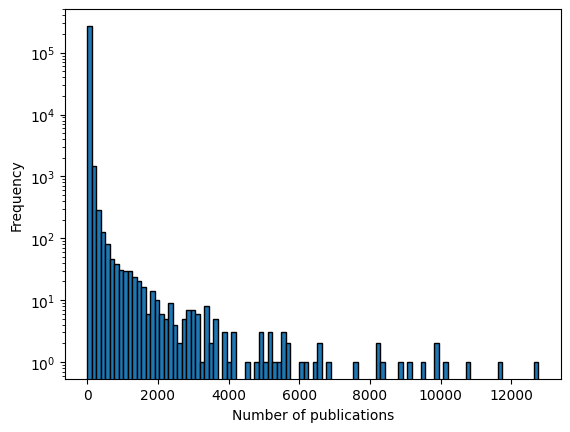

Mean = 8.725484672317975
Standard Deviation = 106.79603003804166
Quartile1 = 1.0
Median = 1.0
Quartile3 = 1.0



Max number of citations in a venue: 12754


In [21]:
no_of_publications_in_each_venue = [v for _, v in venues_and_their_publications_dataset.items()]
print(no_of_publications_in_each_venue[:10])

plt.hist(no_of_publications_in_each_venue, bins=100, log=True, edgecolor='black')
plt.xlabel('Number of publications')
plt.ylabel('Frequency')
plt.show()


avg = mean(no_of_publications_in_each_venue)
standard_deviation = stdev(no_of_publications_in_each_venue)
print("Mean =", avg)
print("Standard Deviation =", standard_deviation)

q1 = np.quantile(no_of_publications_in_each_venue, 0.25)
q2 = np.quantile(no_of_publications_in_each_venue, 0.5)
q3 = np.quantile(no_of_publications_in_each_venue, 0.75)

print("Quartile1 =", q1)
print("Median =", q2)
print("Quartile3 =", q3)
print("\n\n")

print("Max number of citations in a venue:", max(no_of_publications_in_each_venue))
# print("Venue with maximum number of publications:", venues_and_their_publications_dataset[-1]['venue'], no_of_publications_in_each_venue[-1])

{'title': 'Proceedings of the Twenty-Fourth ACM Symposium on Operating Systems Principles', 'author': ['Michael Kaminsky', 'Mike Dahlin'], 'year': 2013, 'venue': 'ACM SIGOPS 24th Symposium on Operating Systems Principles', 'index': 2015217, 'citations': ['613', '747', '4618', '9239', '13015', '17885', '29590', '29589', '31790', '32896', '41841', '41683', '46424', '46606', '51998', '55336', '65452', '65486', '65858', '68142', '69502', '69723', '69311', '70067', '77004', '82231', '85200', '86475', '86930', '90763', '91630', '94556', '100574', '107721', '107926', '107714', '108559', '109555', '114581', '115556', '115660', '119414', '128205', '128321', '131258', '131254', '131554', '144714', '151533', '151537', '151535', '151525', '162104', '164765', '172938', '178704', '186828', '189577', '190644', '193148', '196090', '201868', '202150', '202145', '202656', '202067', '204398', '209876', '210209', '210193', '211189', '212405', '214086', '214973', '221467', '223330', '227943', '232760', '23

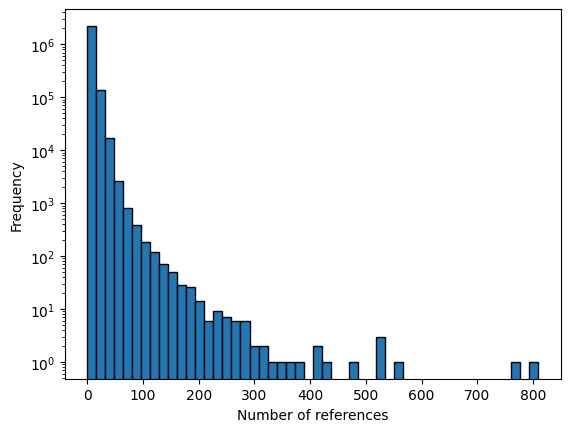

Average number of references per publication =  4.055188829156091


In [34]:
# no_of_references = []

# for each_record in entire_dataset:
#     new_dict = {'title': each_record['title'], 'year': each_record['year']}
#     if 'citations' in each_record:
#         new_dict['no_of_references'] = len(each_record['citations'])
#     else:
#         new_dict['no_of_references'] = 0
#     no_of_references.append(new_dict)

for each_record in entire_dataset:
    no_of_refs = 0
    if 'citations' in each_record: 
        no_of_refs = len(each_record['citations'])
        if no_of_refs == 809:
            print(each_record)
    each_record['no_of_references'] = no_of_refs

no_of_references = [rec['no_of_references'] for rec in entire_dataset]
maximum = max(no_of_references)
print(maximum)

plt.hist(no_of_references, bins=50, log=True, edgecolor="black")
plt.xlabel("Number of references")
plt.ylabel("Frequency")
plt.show()

print("Average number of references per publication = ", sum(no_of_references) / len(entire_dataset))


# no_of_references.sort(key=lambda x: x['no_of_references'], reverse=False)
# print(no_of_references)
# print(len(no_of_references))
# print("Publication with maximum number of references:", no_of_references[-1]['title'], "-", no_of_references[-1]['no_of_references'])



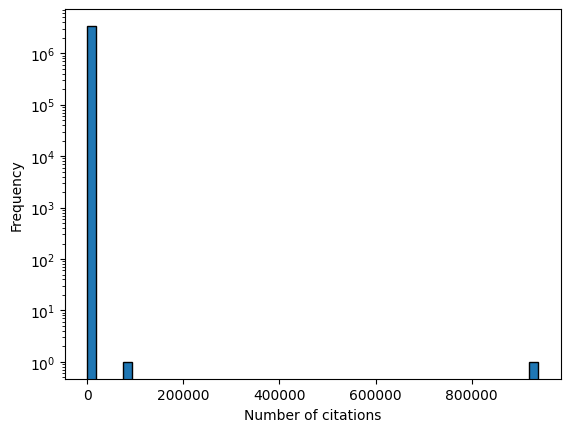

Index of publication with max number of citations is 2135000
Average citations per publication =  4.055188829156091


In [37]:
no_of_citations = {rec['index']:0 for rec in entire_dataset}

for record in entire_dataset:
    if 'citations' in record:
        for cit in record['citations']:
            if cit in no_of_citations:
                no_of_citations[cit] += 1
            else:
                no_of_citations[cit] = 1

cits = [x for x in no_of_citations.values()]

plt.hist(cits, bins=50, log=True, edgecolor="black")
plt.xlabel("Number of citations")
plt.ylabel("Frequency")
plt.show()

for k, v in no_of_citations.items():
    if v > 700000:
        print("Index of publication with max number of citations is", k)


print("Average citations per publication = ", sum(cits) / len(entire_dataset))

# no_of_citations.sort(key=lambda x: x['index'], reverse=False)
# max_index = len(no_of_citations) - 1

# for each_record in entire_dataset:
#     if 'citations' in each_record:
#         for citation in each_record['citations']:
#             if int(citation) > max_index:
#                 continue
#             else:
#                 no_of_citations[int(citation)-1]['no_of_citations'] += 1

# no_of_citations.sort(key=lambda x: x['no_of_citations'], reverse=False)
# print(no_of_citations)
# print("Publication that was cited maximum number of times:", no_of_citations[max_index]['title'], "-", no_of_citations[max_index]['no_of_citations'])


Max impact factor: 0.0


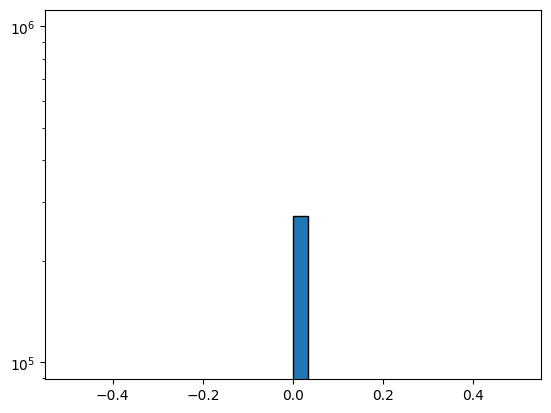

In [36]:
venues_and_number_of_citations = {k:0 for k, _ in venues_and_their_publications_dataset.items()}

for rec in entire_dataset:
    if 'venue' in rec:
        venue = rec['venue']
    else:
        continue
    index = rec['index']
    no_of_cits = no_of_citations[index]
    venues_and_number_of_citations[venue] += no_of_cits

venues_and_impact_factor = {k:0 for k, _ in venues_and_their_publications_dataset.items()}

for ven, num in venues_and_their_publications_dataset.items():
    venues_and_impact_factor[ven] = venues_and_number_of_citations[ven] / num

impact_factor_list = [x for x in venues_and_impact_factor.values()]
print("Max impact factor:", max(impact_factor_list))
plt.hist(impact_factor_list, bins=30, log=True, edgecolor='black')
# plt.xlabel("Impact factor")
plt.show()

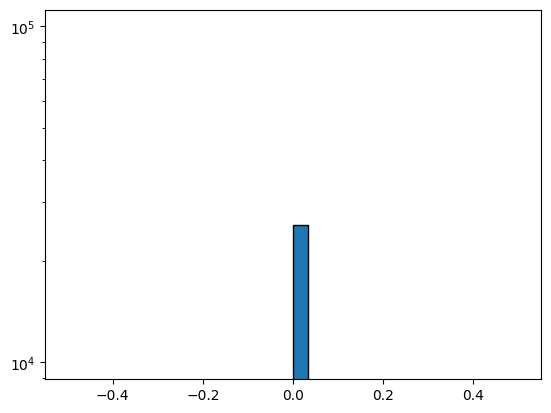

In [50]:
venues_with_atleast_10_publications = {}
for k, v in venues_and_their_publications_dataset.items():
    if v >= 10:
        venues_with_atleast_10_publications[k] = v

venues_and_impact_factor1 = {k:0 for k, _ in venues_with_atleast_10_publications.items()}

for ven, num in venues_with_atleast_10_publications.items():
    x = venues_and_number_of_citations[ven]
    venues_and_impact_factor1[ven] = x / num

new_impact_factor_list = [x for x in venues_and_impact_factor1.values()]

plt.hist(new_impact_factor_list, bins=30, log=True, edgecolor='black')
plt.show()

# venues_and_their_publications_dataset.sort(key=lambda x: x['impact_factor'], reverse=False)
# citation_counts_for_publications_in_venue_with_max_impact_factor = []
# for ind in venues_and_their_publications_dataset[-1]['all_indexes']:
#     temp_dict = {"index": ind}
#     for rec in no_of_citations:
#         if rec['index'] == ind:
#             temp_dict['no_of_citations'] = rec['no_of_citations']
#     citation_counts_for_publications_in_venue_with_max_impact_factor.append(temp_dict)
# print(citation_counts_for_publications_in_venue_with_max_impact_factor)

# list_of_citation_counts = [x['no_of_citations'] for x in citation_counts_for_publications_in_venue_with_max_impact_factor]
# median_of_citation_counts = statistics.median(list_of_citation_counts)

# print("Median =", median_of_citation_counts)
# print("Average =", venues_and_their_publications_dataset[-1]['impact_factor'])

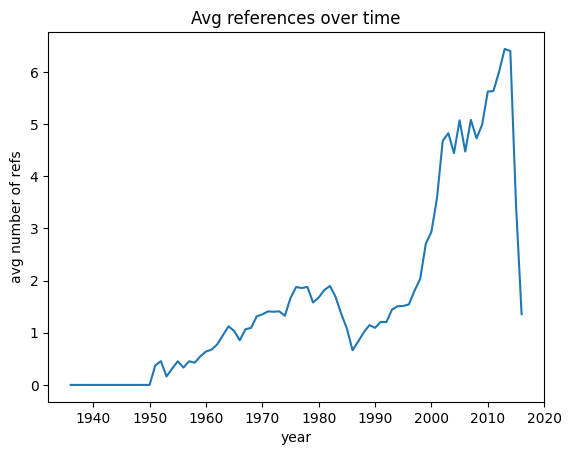

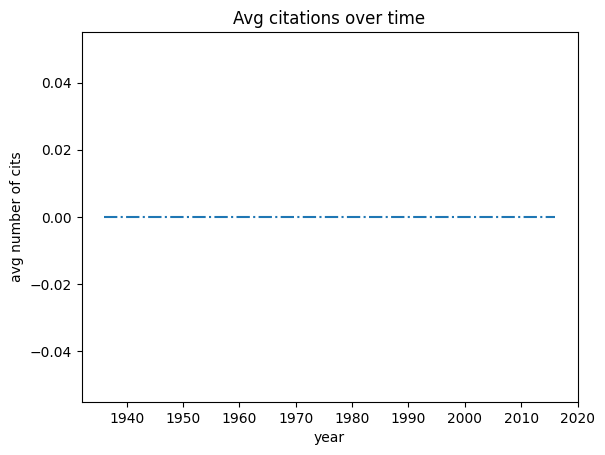

In [49]:
from pprint import pprint
import matplotlib.pyplot as plt

all_years = {}
for rec in entire_dataset:
    ind = rec['index']
    if 'year' in rec:
        y = rec['year']
        if y in all_years:
            all_years[y]['no_of_publications'] += 1
            all_years[y]['no_of_references'] += rec['no_of_references']
            all_years[y]['no_of_citations'] += no_of_citations[ind]
        else:
            all_years[y] = {
                'no_of_publications': 1, 
                'no_of_references': rec['no_of_references'], 
                'no_of_citations': no_of_citations[ind], 
                'avg_no_of_references_per_pub': 0, 
                'avg_no_of_citations_per_pub': 0
                }
    
            
for yr, rec in all_years.items():
    rec['avg_no_of_references_per_pub'] = rec['no_of_references'] / rec['no_of_publications']
    rec['avg_no_of_citations_per_pub'] = rec['no_of_citations'] / rec['no_of_publications']

yrs = [y for y in all_years.keys()]
yrs.sort()

avg_refs = []
avg_cits = []
for y in yrs:
    avg_refs.append(all_years[y]['avg_no_of_references_per_pub'])
    avg_cits.append(all_years[y]['avg_no_of_citations_per_pub'])
# all_years = [each_datapoint['year'] for each_datapoint in entire_dataset if 'year' in each_datapoint]
# min_year = min(all_years)
# max_year = max(all_years)
# years = [
#     {'year': i, 
#      'no_of_publications': 0, 
#      'no_of_references': 0, 
#      'no_of_citations': 0, 
#      'avg_no_of_references_per_pub': 0, 
#      'avg_no_of_citations_per_pub': 0}
#      for i in range(min_year, max_year+1)]

# for rec in entire_dataset:
#     if 'year' in rec:
#         yr = rec['year']
#     else:
#         continue
#     ind = yr - min_year
#     years[ind]['no_of_publications'] += 1

# pprint(years)
# print("\n\n")

# for rec in no_of_references:
#     yr = rec['year']
#     ind = yr - min_year
#     years[ind]['no_of_references'] += rec['no_of_references']

# for rec in no_of_citations:
#     yr = rec['year']
#     ind = yr - min_year
#     years[ind]['no_of_citations'] += rec['no_of_citations']


# for rec in years:
#     rec['avg_no_of_references_per_pub'] = rec['no_of_references'] / rec['no_of_publications']
#     rec['avg_no_of_citations_per_pub'] = rec['no_of_citations'] / rec['no_of_publications']

# pprint(years)

# avg_refs = [each_year['avg_no_of_references_per_pub'] for each_year in years]
# avg_cit = [each_year['avg_no_of_citations_per_pub'] for each_year in years]
# yrs = [each_year['year'] for each_year in years]

plt.plot(yrs, avg_refs)
plt.xlabel("year")
plt.ylabel("avg number of refs")
plt.title("Avg references over time")
plt.show()

plt.figure()
plt.plot(yrs, avg_cits, '-.')
plt.xlabel("year")
plt.ylabel("avg number of cits")
plt.title("Avg citations over time")
plt.show()